<a href="https://colab.research.google.com/github/NAVENA30/Dataset/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predictions: [0, 1, 1, 0]
Accuracy: 1.0


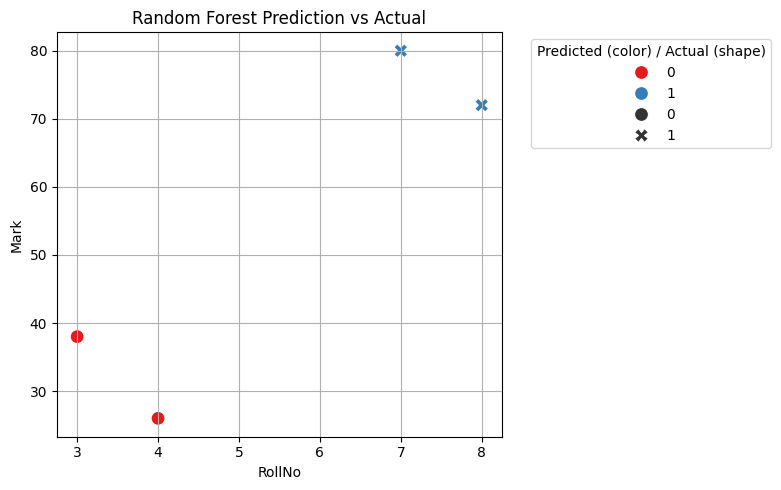

<ipython-input-9-df6708c45488>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


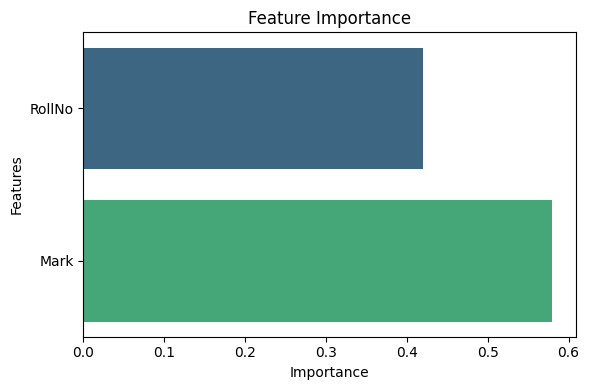

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Randomforest.csv")

df['Percent'] = df['Percent'].map({'Fail': 0, 'Pass' : 1})

x = df[['RollNo', 'Mark']]
y = df['Percent']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 1)

model = RandomForestClassifier(n_estimators=15, random_state=1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Predictions:", y_pred.tolist())
print("Accuracy:",accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,5))
sns.scatterplot(x=x_test['RollNo'], y=x_test['Mark'], hue=y_pred, style=y_test, s=100, palette="Set1")
plt.title("Random Forest Prediction vs Actual")
plt.xlabel("RollNo")
plt.ylabel("Mark")
plt.legend(title='Predicted (color) / Actual (shape)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

importances = model.feature_importances_
feature_names = x.columns
plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()